In [34]:
using DifferentialEquations
using LaTeXStrings
using Plots

In [35]:
tspan = (0.0, 100.0);
ϵ = 0.1;
a = 1.0;

In [36]:
function prob1!(dv, v, p, t)
    u = v[1]
    du = v[2]
    dv[1] = du
    dv[2] = -u + ϵ*u^2
end

prob1! (generic function with 1 method)

In [37]:
u0 = [a, 0]
prob = ODEProblem(prob1!, u0, tspan)
sol = solve(prob, Tsit5(), reltol = 1e-8, abstol = 1e-8);

$$ u_{\mathrm{RP}}(t) \sim a \cos t+\epsilon \frac{a}{2} t \sin t-\epsilon^2 \frac{a}{8} t(t \cos t-\sin t)$$

In [38]:
tvals = LinRange(tspan[1], tspan[2], 1000)
rp(t) = a*cos(t)+ϵ*(a/2)*t*sin(t)-ϵ^2*(a/8)*t*(t*cos(t)-sin(t));

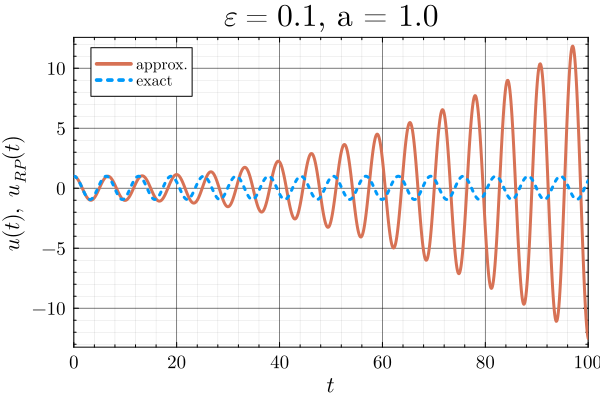

In [42]:
theme(:dao::Symbol)

plot(tvals, rp.(tvals), 
    line=(3, :solid),
    label="approx.")
plot!(sol, 
    idxs=[1],
    line=(3, :dot),
    label="exact",
    title=L"$\varepsilon = $"*"$ϵ, "*"a = "*"$a",
    xlabel=L"$t$",
    ylabel=L"$u(t), \ u_{RP}(t)$",
    legend=:best,
    titlefontsize=20,
    tickfontsize=12,
    legendfontsize=10,
    yguidefontsize=15,
    xguidefontsize=15,)
# savefig("Aero_HW4_Prob1_RP_100.pdf")